from package import module.class(function)


In [1]:
from marcap import marcap_data

In [151]:
df = marcap_data('2018-01-01', '2022-02-03', code='005930')

In [152]:
latest_stocks = df.iloc[-1]['Stocks'] # 범위 마지막날 주식수(기준)
df['Adj_Close'] = df['Close'] * (df['Stocks'] / latest_stocks)

In [153]:
from matplotlib import pyplot as plt


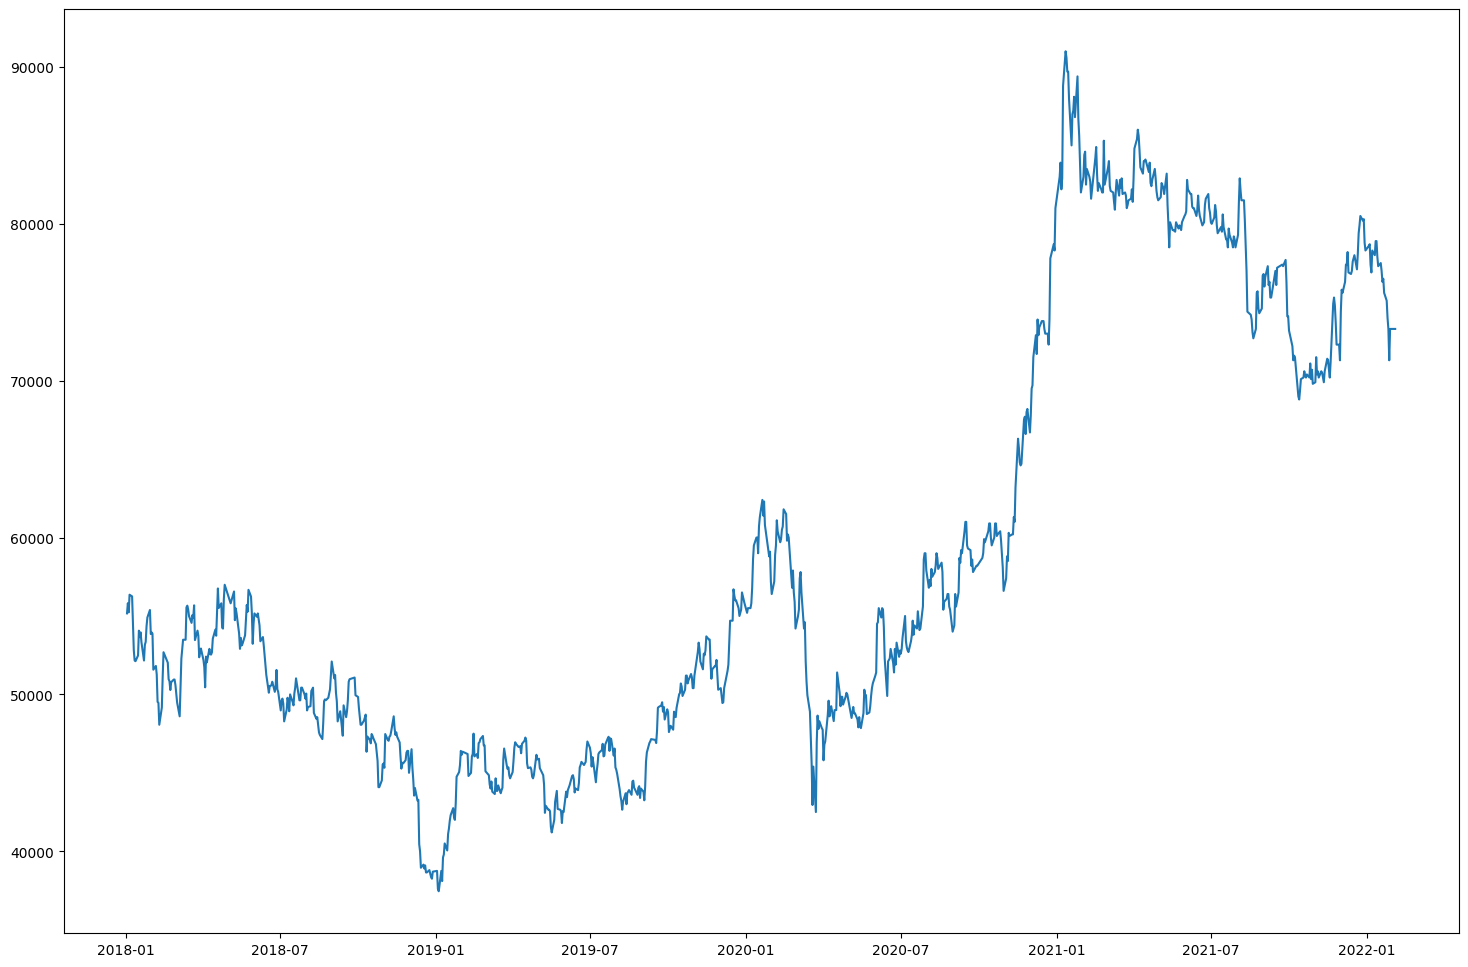

In [154]:
plt.figure(figsize=(18,12))
plt.plot(df['Adj_Close'], label='price')

In [155]:
df['Rescaled_Vol'] = df['Volume'] / df['Volume'].sum()
df['Rescaled_Close'] = df['Adj_Close'] / df['Adj_Close'].sum()

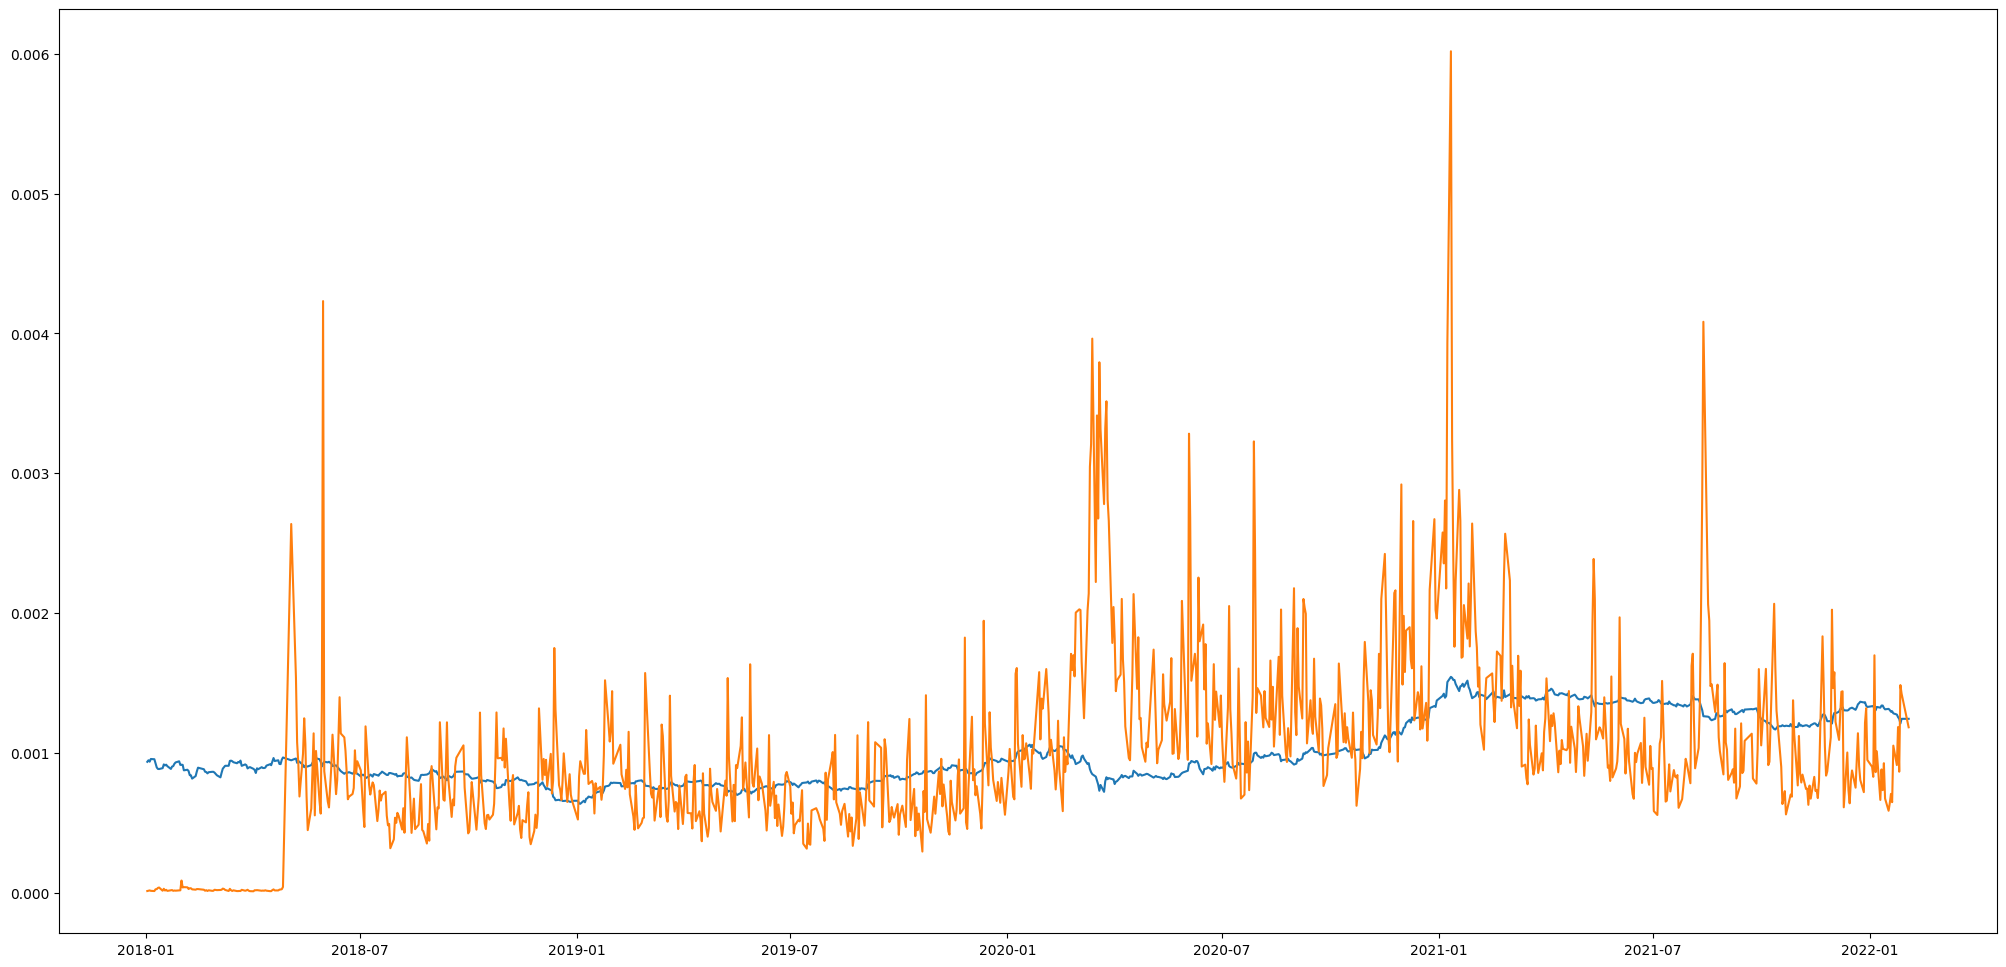

In [156]:
plt.figure(figsize=(25,12))
plt.plot(df['Rescaled_Close'], label='price')
plt.plot(df['Rescaled_Vol'], label='vol')
plt.show()

In [157]:
import numpy as np

In [158]:
def ma(values: list, v=30):
    mas = []
    for i in range(len(values)):
        if v > i:
            mas.append(0) 
        else:
            mas.append(np.mean(values[i-v:i]))
    return mas

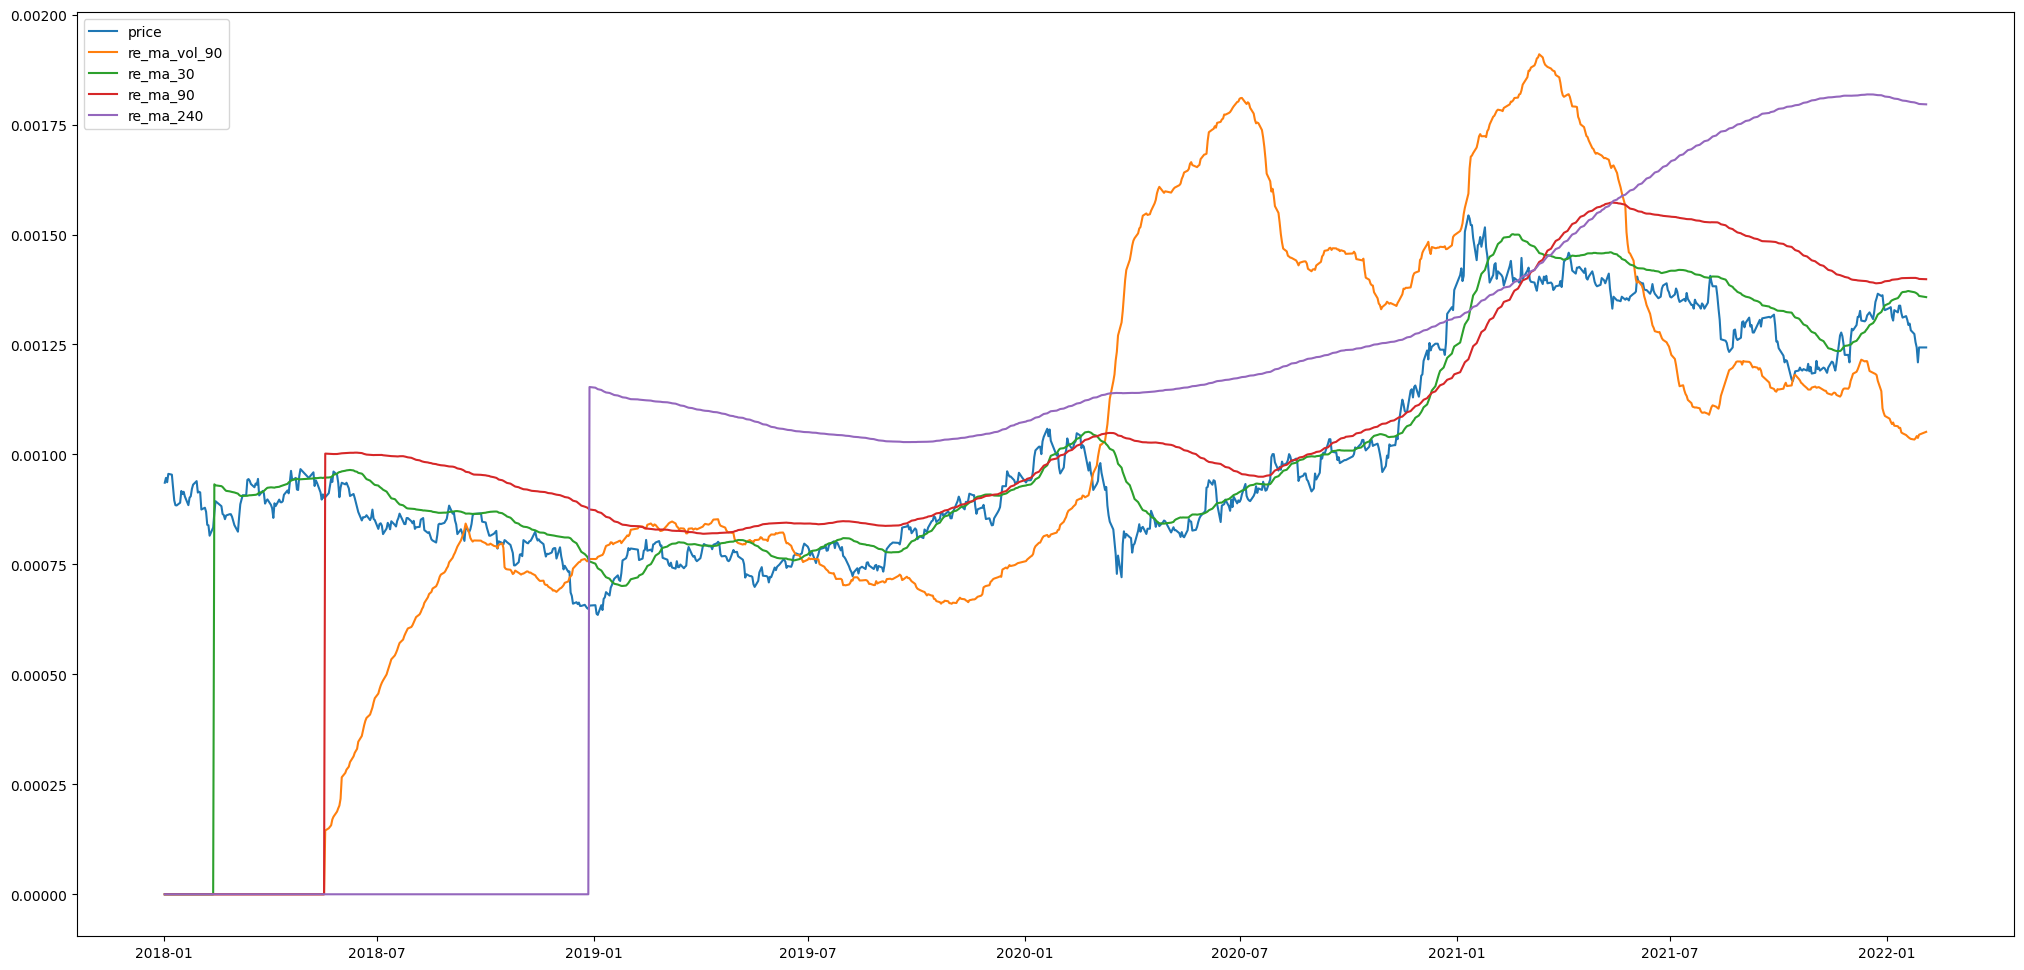

In [161]:
plt.figure(figsize=(25,12))
plt.plot(df['Rescaled_Close'], label='price')
v = 90
df[f'ma_vol_{v}'] = ma(df['Volume'], v=v)
df[f're_ma_vol_{v}'] = df[f'ma_vol_{v}'] / df[f'ma_vol_{v}'].sum() 
plt.plot(df[f're_ma_vol_{v}'], label=f're_ma_vol_{v}')
ma_list = [30,90,240]
for v in ma_list:
    
    df[f'ma_{v}'] = ma(df['Adj_Close'], v=v)
    df[f're_ma_{v}'] = df[f'ma_{v}'] / df[f'ma_{v}'].sum() 
    
    plt.plot(df[f're_ma_{v}'], label=f're_ma_{v}')
plt.legend()

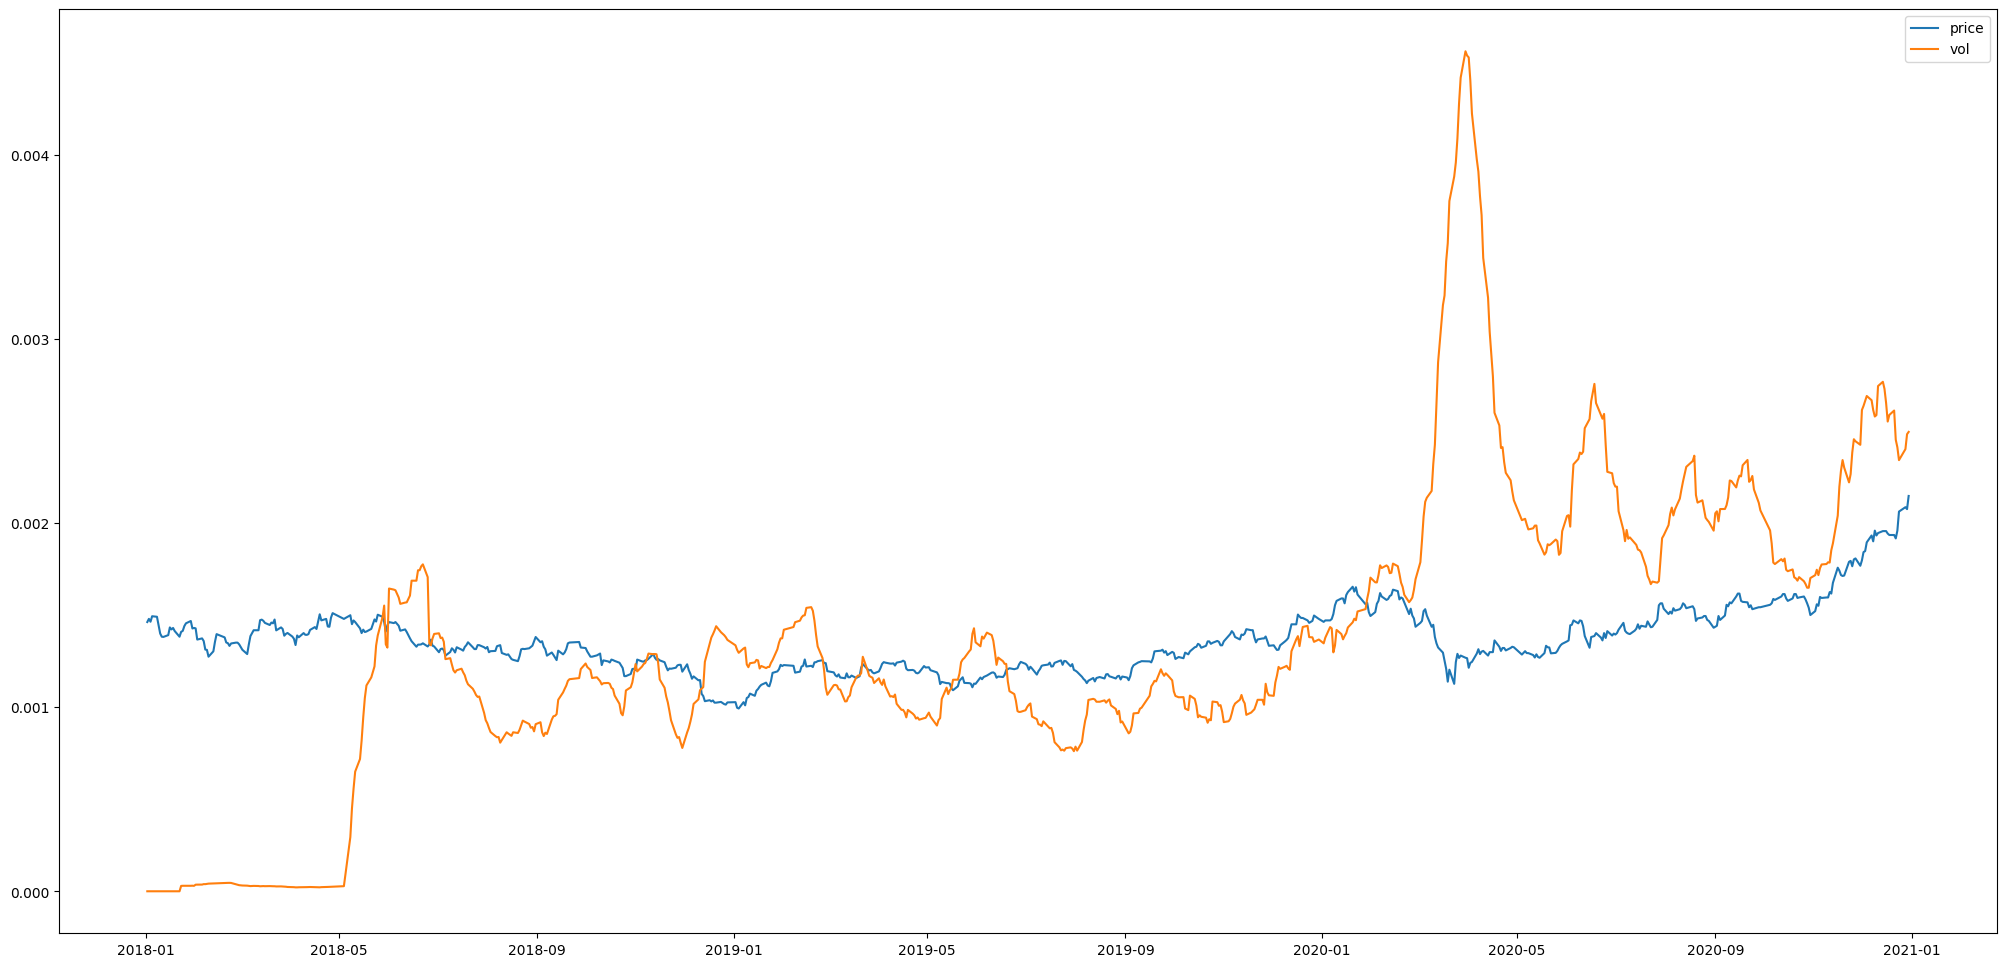

In [149]:
plt.figure(figsize=(25,12))
plt.plot(df['Rescaled_Close'], label='price')
df['ma_vol'] = ma(df['Volume'], v=15)
df['re_ma_vol'] = df['ma_vol'] / df['ma_vol'].sum() 
plt.plot(df['re_ma_vol'], label='vol')
plt.legend()

In [118]:
ma_list = [15,30,60,90,120]
for v in ma_list:
    df[f'ma_{v}'] = ma(df['Adj_Close'], v=v)

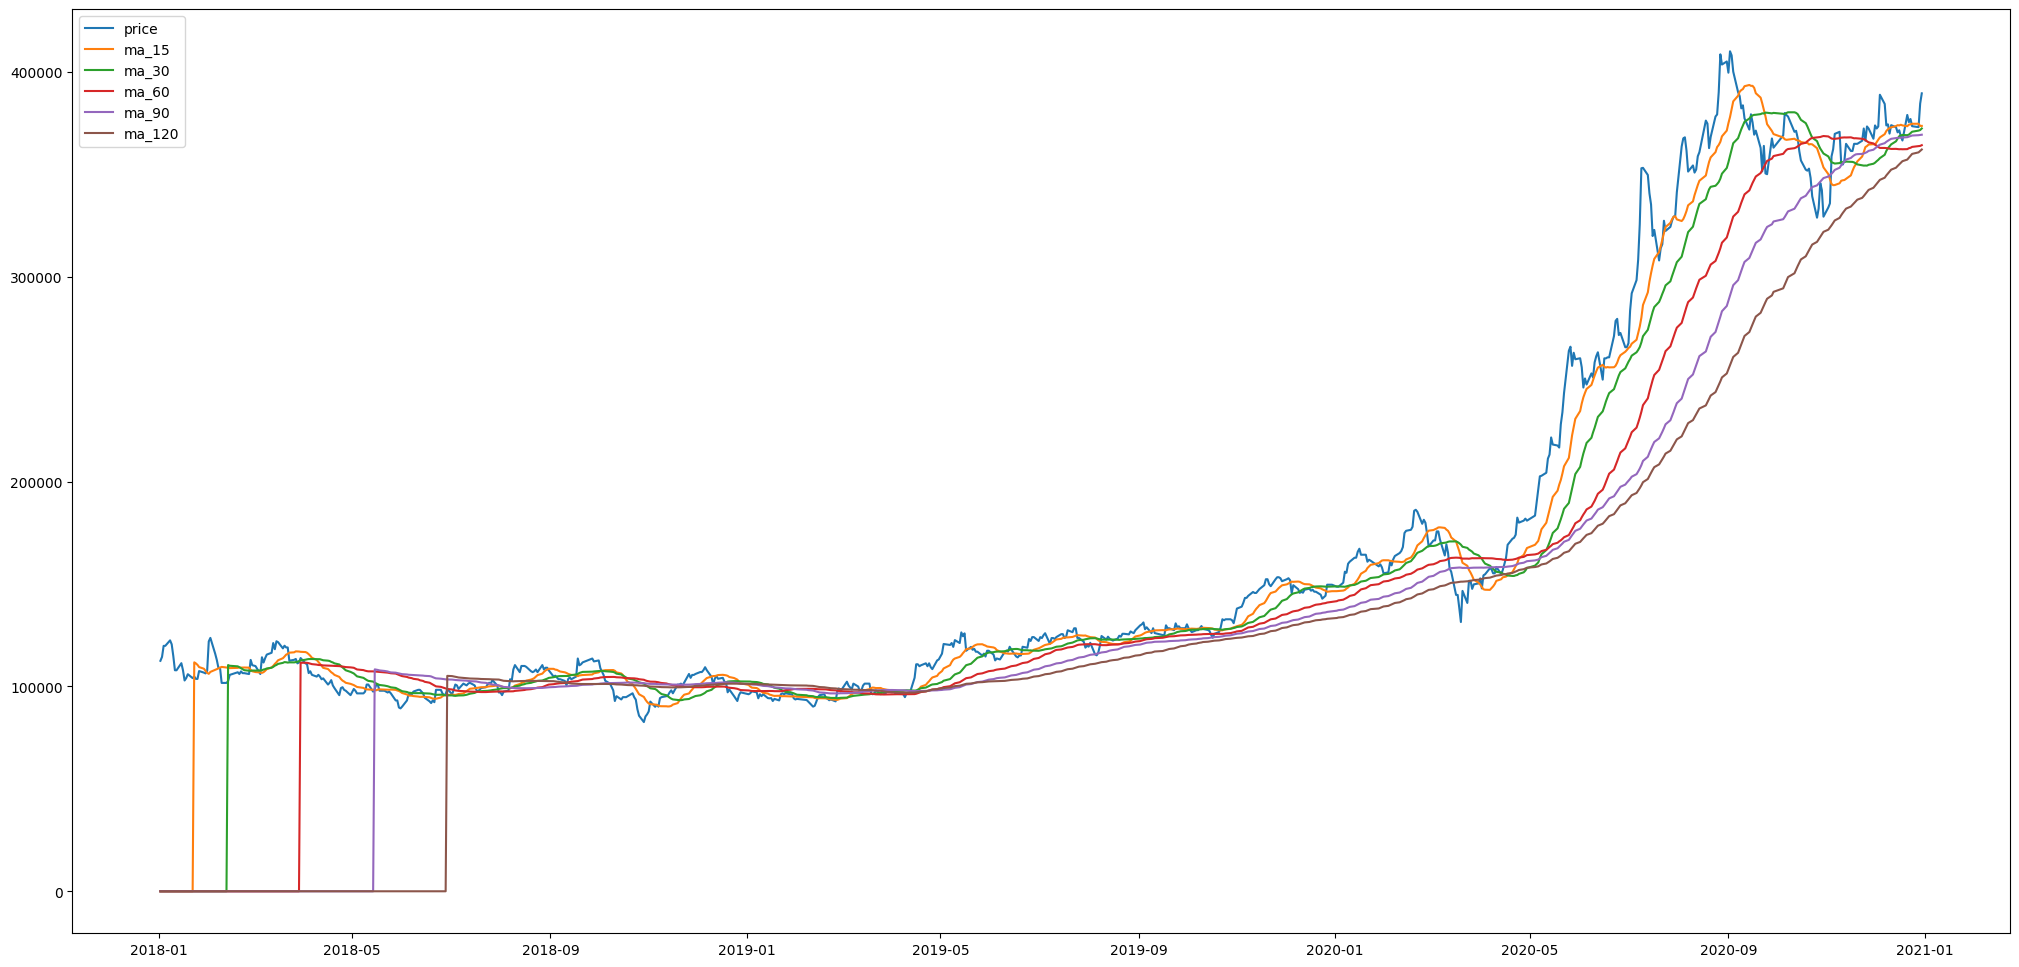

In [119]:
plt.figure(figsize=(25,12))
plt.plot(df['Adj_Close'], label='price')
ma_list = [15,30,60,90,120]
for v in ma_list:
    plt.plot(df[f'ma_{v}'], label=f'ma_{v}')
plt.legend()

In [ ]:
import requests

requests(data